# <ins>Impact of Company Size on Job Title and Experience Level</ins>

## <ins>Job Title Hypotheses:</ins>
### <ul><li>The distribution of job titles varies significantly among different company size categories.</li></ul>
### <ul><li>Certain job titles are more prevalent in larger companies compared to smaller ones.</li></ul>

## <ins>Experience Level Hypotheses:</ins>
### <ul><li>The distribution of experience levels differs across company size categories.</li></ul>
### <ul><li>Employees in larger companies generally have higher levels of experience compared to those in smaller companies.</li></ul>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
clean_data_path = "Resources/clean_data.csv"

# Read the mouse data and the study results
clean_data_df = pd.read_csv(clean_data_path)

# Display the data table for preview
clean_data_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,239900,USD,239900,US,100,US,M
1,2023,SE,FT,Data Scientist,159900,USD,159900,US,100,US,M
2,2023,EN,FT,Data Analyst,162240,USD,162240,US,0,US,M
3,2023,EN,FT,Data Analyst,47840,USD,47840,US,0,US,M
4,2023,SE,FT,Data Engineer,130410,USD,130410,US,0,US,M


## <ins>Narrow and Filter Data</ins>
### <ul><li>Group by Company Size and Job Title.</li></ul>
### <ul><li>Find the top 5 job titles for each company size.</li></ul>
### <ul><li>Merge with original Dataframe.</li></ul>

In [2]:
# Group by 'company_size' and 'job_title', count occurrences, and reset the index
grouped_size_data = clean_data_df.groupby(['company_size', 'job_title']).size().reset_index(name='count')

# Find the top 5 job titles for each company size
top_job_titles = grouped_size_data.sort_values(by='count', ascending=False).groupby('company_size').head(5).reset_index(drop=True)

# Merge with the original DataFrame to get additional information
result_df = pd.merge(top_job_titles, clean_data_df, on=['company_size', 'job_title'], how='inner')

# Display resulting DataFrame
result_df

,company_size,job_title,count,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
0,M,Data Engineer,1603,2023,SE,FT,130410,USD,130410,US,0,US
1,M,Data Engineer,1603,2023,SE,FT,92000,USD,92000,US,0,US
2,M,Data Engineer,1603,2023,SE,FT,130410,USD,130410,US,0,US
3,M,Data Engineer,1603,2023,SE,FT,92000,USD,92000,US,0,US
4,M,Data Engineer,1603,2023,SE,FT,333500,USD,333500,US,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...
5521,S,Data Scientist,3,2023,EN,FT,110000,USD,110000,US,50,US
5522,S,ML Engineer,2,2023,MI,CT,30000,USD,30000,US,100,US
5523,S,ML Engineer,2,2023,MI,CT,25500,USD,25500,US,100,US
5524,S,Machine Learning Scientist,2,2023,MI,FT,200000,USD,200000,US,0,US


In [3]:
job_title_counts = result_df.groupby(['company_size', 'job_title']).size().reset_index(name='value_counts')
job_title_counts

,company_size,job_title,value_counts
0,L,Applied Scientist,164
1,L,Business Intelligence Engineer,76
2,L,Data Engineer,33
3,L,Machine Learning Engineer,17
4,L,Research Scientist,19
5,M,Data Analyst,1062
6,M,Data Engineer,1603
7,M,Data Scientist,1455
8,M,Machine Learning Engineer,832
9,M,Research Scientist,250


## <ins>Job Title Hypotheses:</ins>
### <ul><li>The distribution of job titles varies significantly among different company size categories.</li></ul>
## <ins>Findings:</ins>
### Large (L) Company Size:
<ins>Central Tendency:</ins>
<ul><li>The mean 'value_counts' for the 'Large' company size is 61.8, indicating the average count of job titles within this category.</li></ul>
<ul><li>The median (50th percentile) is 33.0, suggesting that half of the observations have 'value_counts' below 33.0 and half above.</li></ul>
<ins>Variability:</ins>
<ul><li>For the 'Large' company size, a standard deviation of 61.88 implies that the 'value_counts' values tend to deviate from the mean by approximately 61.88 on average.</li></ul>
<ul><li>The range extends from a minimum of 17.0 to a maximum of 164.0, showcasing the full scope of values.</li></ul>
<ul><li>The 25th percentile is 19.0, meaning that 25% of observations have 'value_counts' below 19.0.</li></ul>
<ul><li>The 75th percentile is 76.0, indicating that 75% of observations have 'value_counts' below 76.0.</li></ul>
<ul><li>The variance of 3828.7 for 'value_counts' in the 'Large' company size category indicates the average squared deviation of individual counts from the mean count. This value is moderate, suggesting a moderate level of variability or dispersion in job title counts within the 'Large' company size with a wide distribution of 'value_counts'.</li></ul>

### Medium (M) Company Size:
<ins>Central Tendency:</ins>
<ul><li>The mean 'value_counts' for the 'Medium' company size is 1040.4, representing the average count of job titles within this category.</li></ul>
<ul><li>The median (50th percentile) is 1062.0, suggesting that half of the observations have 'value_counts' below 1062.0 and half above.</li></ul>
<ins>Variability:</ins>
<ul><li>For the 'Medium' company size, a standard deviation of 537.83 indicates a higher degree of variability, with values deviating from the mean by approximately 537.83 on average.</li></ul>
<ul><li>The range extends from a minimum of 250.0 to a maximum of 1603.0, showcasing the full scope of values.</li></ul>
<ul><li>The 25th percentile is 832.0, meaning that 25% of observations have 'value_counts' below 832.0.</li></ul>
<ul><li>he 75th percentile is 1455.0, indicating that 75% of observations have 'value_counts' below 1455.0.</li></ul>
<ul><li>The large variance of 289260.3 for 'value_counts' in the 'Medium' company size category indicates a substantial level of variability or dispersion in job title counts. This implies that the counts of job titles within the 'Medium' company size vary significantly from the mean with a wide distribution and a large range of 'value_counts'.</li></ul>

### Small (S) Company Size:
<ins>Central Tendency:</ins>
<ul><li>The mean 'value_counts' for the 'Small' company size is 3.0, representing the average count of job titles within this category.</li></ul>
<ul><li>The median (50th percentile) is 3.0, suggesting that half of the observations have 'value_counts' below 3.0 and half above.</li></ul>
<ins>Variability:</ins>
<ul><li>For the 'Small' company size, a standard deviation of 1.0 suggests very low variability, as values are close to the mean.</li></ul>
<ul><li>The range extends from a minimum of 2.0 to a maximum of 4.0, showcasing a limited variability.</li></ul>
<ul><li>The 25th percentile is 2.0, meaning that 25% of observations have 'value_counts' below 2.0.</li></ul>
<ul><li>The 75th percentile is 4.0, indicating that 75% of observations have 'value_counts' below 4.0.</li></ul>
<ul><li>The variance of 1.0 for 'value_counts' in the 'Small' company size category is relatively low. This suggests a low level of variability or dispersion in job title counts within the 'Small' company size, with values clustered closely around the mean.</li></ul>   

### Overall Interpretation:

In summary, the overall distribution of job titles varies among different company sizes. Large companies have a moderate spread of job title counts, medium-sized companies exhibit considerable variability, and small companies show low variability with a more concentrated distribution. 

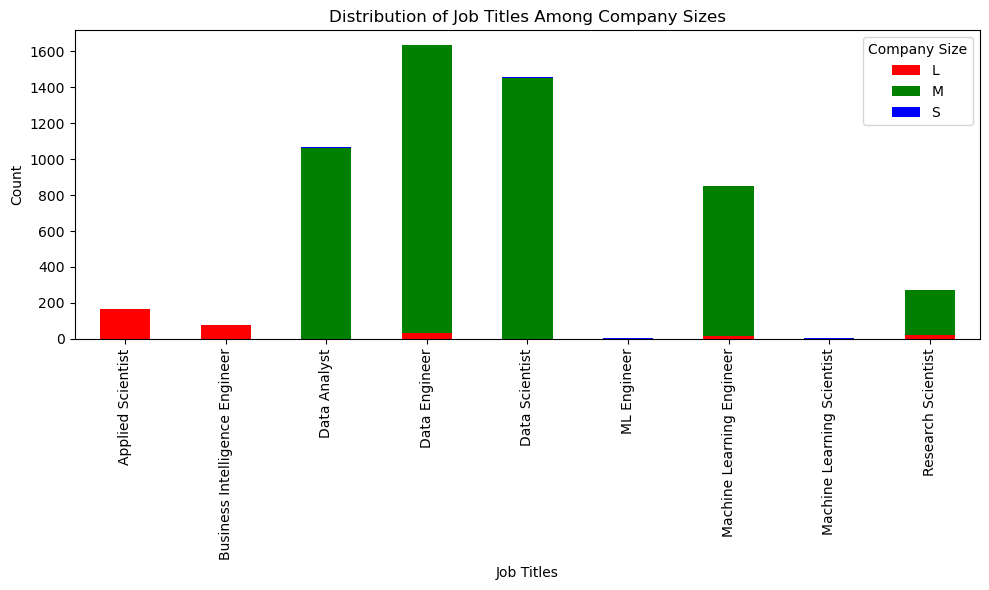

In [4]:
# Pivot the dataframe to get a better format for visualization
pivot_df = job_title_counts.pivot(index='job_title', columns='company_size', values='value_counts').fillna(0)

# Color dictionary
color_dict = {'L': 'red', 'M': 'green', 'S': 'blue'}  # Adjust as per your actual company size values

# Plotting a stacked bar chart with colors
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=[color_dict.get(col, 'gray') for col in pivot_df.columns])
plt.title('Distribution of Job Titles Among Company Sizes')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.legend(title='Company Size')
plt.tight_layout()
plt.savefig('Distribution_of_Job_Titles_Among_Company_Sizes.jpeg', bbox_inches='tight')
plt.show()

In [5]:
descriptive_stats = job_title_counts.groupby('company_size')['value_counts'].describe()

variance_by_company_size = job_title_counts.groupby('company_size')['value_counts'].var()

# Convert to string
descriptive_stats_str = descriptive_stats.to_string()
variance_str = variance_by_company_size.to_string()

# Plotting descriptive statistics
fig, ax = plt.subplots()
ax.text(0, 0.5, descriptive_stats_str, fontsize=10, va='center')
ax.axis('off')
plt.title('Descriptive Statistics')

# Save the plot as a JPEG image
plt.savefig('descriptive_statistics.jpg', bbox_inches='tight')
plt.close()

# Plotting variance results
fig, ax = plt.subplots()
ax.text(0, 0.5, variance_str, fontsize=10, va='center')
ax.axis('off')
plt.title("Variance for 'value_counts'")

# Save the plot as a JPEG image
plt.savefig('variance_by_company_size.jpg', bbox_inches='tight')
plt.close()

# Print the results
print("Descriptive Statistics:")
print(descriptive_stats)

print("\nVariance for 'value_counts':", variance_by_company_size)

Descriptive Statistics:
              count    mean         std    min    25%     50%     75%     max
company_size                                                                 
L               5.0    61.8   61.876490   17.0   19.0    33.0    76.0   164.0
M               5.0  1040.4  537.829248  250.0  832.0  1062.0  1455.0  1603.0
S               5.0     3.0    1.000000    2.0    2.0     3.0     4.0     4.0

Variance for 'value_counts': company_size
L      3828.7
M    289260.3
S         1.0
Name: value_counts, dtype: float64


## <ins>Job Title Hypotheses:</ins>
### <ul><li>Certain job titles are more prevalent in larger companies compared to smaller ones.</li></ul>

## <ins>Findings:</ins>
Certain job titles show variations in prevalence across different company sizes.

Machine Learning Engineers are prevalent in companies of all sizes.

<ins>Specialized Roles in Large and Medium Companies:</ins>
Data Engineers and Research Scientists are found across large and medium companies.

<ins>Specialized Roles in Medium and Small Companies:</ins>
Data Scientists and Data Analysts are found across medium and small companies.

<ins>Specialized Roles in Larger Companies:</ins>
Roles like Applied Scientist and Business Intelligence Engineer are more prevalent in larger companies.

<ins>Specialized Roles in Smaller Companies:</ins>
Some specialized roles like ML Engineers and Machine Learning Scientists are found in smaller companies.

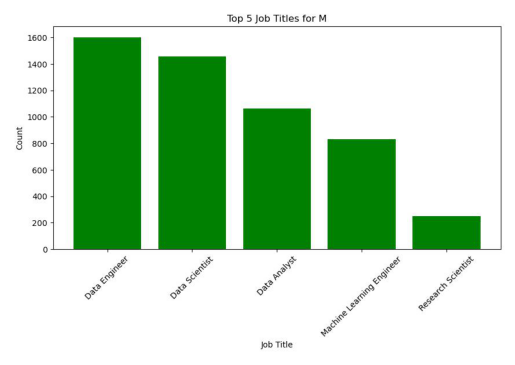

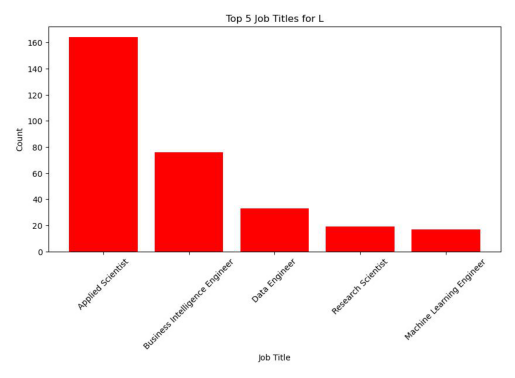

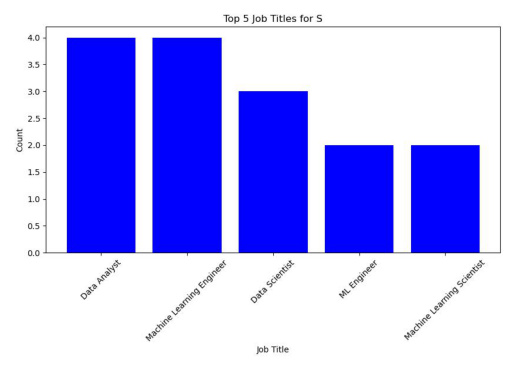

In [6]:
# Get unique company sizes for creating individual plots
company_sizes = result_df['company_size'].unique()

# Define a color dictionary for each company size
color_dict = {'L': 'red', 'M': 'green', 'S': 'blue'}  # Adjust as per your actual company size values

# List to store filenames
filenames = []

for size in company_sizes:
    # Create a new figure for each company size
    plt.figure(figsize=(10, 5))

    # Filter data for the current company size
    data_for_size = result_df[result_df['company_size'] == size]

    # Plot the bar chart with the corresponding color
    plt.bar(data_for_size['job_title'], data_for_size['count'], color=color_dict[size])
    plt.title(f"Top 5 Job Titles for {size}")
    plt.xlabel("Job Title")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Save each individual plot
    filename = f'Top_5_Job_Titles_{size}.jpeg'
    plt.savefig(filename, bbox_inches='tight')

    # Append the filename to the list
    filenames.append(filename)

    # Close the current figure to free up resources
    plt.close()

# Display all saved plots
for filename in filenames:
    img = plt.imread(filename)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## <ins>Experience Level Hypotheses:</ins>
### <ul><li>The distribution of experience levels differs across company size categories.</li></ul>


## <ins>Findings:</ins>

<ins>Entry Level (EN):</ins>
Entry-level positions are higher in Small companies compared to Medium and Large companies, but not by much.

<ins>Mid Level (MI):</ins>
Mid-level positions are distributed relatively evenly across medium and large company sizes.
Small companies show a much higher count of mid-level positions compared to other sizes.

<ins>Senior Level (SE):</ins>
Senior-level positions dominate in Large (L) and Medium (M) companies.
Small (S) companies have a lower count of senior-level positions.

<ins>Executive Level (EX):</ins>
Executive-level positions are scarce across all company sizes.

<ins>Overall Interpretation:</ins>
Large and Medium-sized companies tend to have a higher proportion of senior-level positions, while entry-level positions are more distributed across various company sizes. Executive-level roles are relatively uncommon.

<ins>Variance Analysis:</ins>
<ins>EN/M and MI/L Categories:</ins>
These categories exhibit relatively high variances, implying substantial fluctuations in demand.

<ins>SE/M Category:</ins>
The variance is notably high, reflecting dynamic demand for senior-level roles in medium-sized companies.
    
<ins>Entry Level (EN):</ins>
Distribution: Job postings are present across large (L) and medium (M) companies.
Demand Variability: The average count is highest for medium-sized companies, indicating a fluctuating demand for entry-level roles.

<ins>Executive Level (EX):</ins>
Distribution: Executive-level job postings are concentrated in medium-sized companies (M).
Demand Characteristics: There is moderate demand, with significant variability, suggesting dynamic executive-level hiring needs.

<ins>Mid Level (MI):</ins>
Distribution: Mid-level job postings are diverse, spanning large (L), medium (M), and small (S) companies.
Demand Concentration: Medium-sized companies have the highest average count, indicating a concentrated demand for mid-level roles.

<ins>Senior Level (SE):</ins>
Distribution: Senior-level roles are found across large (L), medium (M), and small (S) companies.
Strong Demand: Medium-sized companies show the highest average count, reflecting a robust demand for senior-level positions.

<ins>Variance Analysis:</ins>
Categories with high variances (EN/M, MI/L, and SE/M) suggest fluctuations in demand. Adaptive workforce planning is crucial in addressing these dynamic needs.
    
The distribution of job counts across experience levels and company sizes is diverse, with notable patterns. Entry-level positions are spread across large and medium companies, while executive roles are concentrated in medium-sized firms. Mid-level roles exhibit diversity, with medium-sized companies showing the highest demand. Senior-level positions are prevalent in large and medium companies. Variability in certain categories indicates fluctuating demand, emphasizing the need for adaptive workforce planning. Overall, the analysis underscores the nuanced and dynamic nature of the job market across different experience levels and company sizes.

In [7]:
# Group by 'company_size', 'job_title', and 'experience_level', count occurrences, and reset the index
grouped_exp_data = result_df.groupby(['company_size', 'job_title', 'experience_level']).size().reset_index(name='count')

grouped_exp_data

,company_size,job_title,experience_level,count
0,L,Applied Scientist,EN,6
1,L,Applied Scientist,MI,28
2,L,Applied Scientist,SE,130
3,L,Business Intelligence Engineer,MI,10
4,L,Business Intelligence Engineer,SE,66
5,L,Data Engineer,EN,1
6,L,Data Engineer,MI,4
7,L,Data Engineer,SE,28
8,L,Machine Learning Engineer,MI,5
9,L,Machine Learning Engineer,SE,12


In [8]:
# Group by 'company_size' and 'experience_level', calculate the average count, and reset the index
average_exp_counts = grouped_exp_data.groupby(['company_size', 'experience_level'])['count'].mean().reset_index(name='average_count')

# Merge the original DataFrame with the calculated averages based on 'company_size' and 'experience_level'
avg_df = pd.merge(grouped_exp_data, average_exp_counts, on=['company_size', 'experience_level'], how='left')

# Display the updated DataFrame with the added 'average_count' column
avg_df

,company_size,job_title,experience_level,count,average_count
0,L,Applied Scientist,EN,6,3.333333
1,L,Applied Scientist,MI,28,10.600000
2,L,Applied Scientist,SE,130,49.200000
3,L,Business Intelligence Engineer,MI,10,10.600000
4,L,Business Intelligence Engineer,SE,66,49.200000
5,L,Data Engineer,EN,1,3.333333
6,L,Data Engineer,MI,4,10.600000
7,L,Data Engineer,SE,28,49.200000
8,L,Machine Learning Engineer,MI,5,10.600000
9,L,Machine Learning Engineer,SE,12,49.200000


In [9]:
# Group by company_size and calculate unique averages
unique_avg = avg_df.groupby('company_size')['average_count'].unique().reset_index()

unique_avg

,company_size,average_count
0,L,"[3.3333333333333335, 10.6, 49.2]"
1,M,"[46.8, 27.2, 176.6, 789.8]"
2,S,"[3.0, 1.0, 2.6666666666666665]"


In [10]:
# Add the associated experience level to the unique_avg DataFrame
unique_avg['experience_level'] = avg_df.groupby('company_size')['experience_level'].unique().reset_index()['experience_level']

unique_avg

,company_size,average_count,experience_level
0,L,"[3.3333333333333335, 10.6, 49.2]","[EN, MI, SE]"
1,M,"[46.8, 27.2, 176.6, 789.8]","[EN, EX, MI, SE]"
2,S,"[3.0, 1.0, 2.6666666666666665]","[SE, EN, MI]"


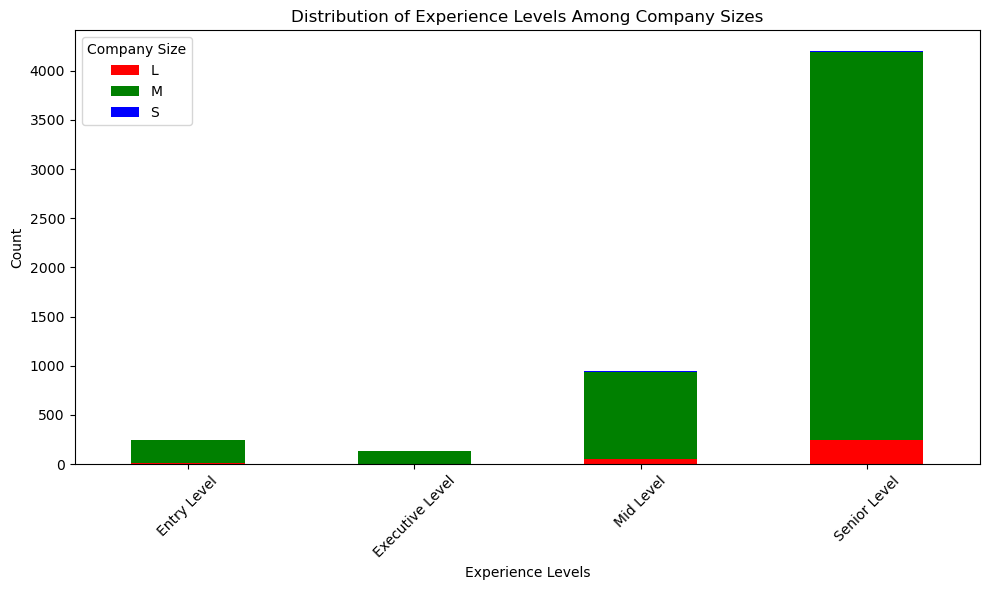

In [11]:
# Pivot the dataframe to get a better format for visualization
pivot_df = grouped_exp_data.pivot_table(index='experience_level', columns='company_size', values='count', aggfunc='sum', fill_value=0)

experience_level_mapping = {'EN': 'Entry Level', 'MI': 'Mid Level', 'SE': 'Senior Level', 'EX': 'Executive Level'}

# Define a color dictionary for each company size
color_dict = {'L': 'red', 'M': 'green', 'S': 'blue'}  # Adjust as per your actual company size values

# Plotting a stacked bar chart with colors
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=[color_dict[col] for col in pivot_df.columns])

# Map the experience level labels to desired names for the x-axis
plt.xticks(ticks=range(len(pivot_df.index)), labels=[experience_level_mapping[level] for level in pivot_df.index], rotation=45)

plt.title('Distribution of Experience Levels Among Company Sizes')
plt.xlabel('Experience Levels')
plt.ylabel('Count')
plt.legend(title='Company Size')
plt.tight_layout()
plt.savefig('Distribution_of_Experience_Levels_Among_Company_Sizes.jpeg', bbox_inches='tight')
plt.show()

In [12]:
# Get descriptive statistics
descriptive_stats_exp = grouped_exp_data.groupby(['experience_level', 'company_size']).describe()

# Get variance for a specific column, e.g., 'count'
variance_value_counts_exp = grouped_exp_data.groupby(['experience_level', 'company_size'])['count'].var()

# Print the results
print("Descriptive Statistics:")
print(descriptive_stats_exp)

print("\nVariance for 'count':", variance_value_counts_exp)

Descriptive Statistics:
                              count                                        \
                              count        mean         std    min    25%   
experience_level company_size                                               
EN               L              3.0    3.333333    2.516611    1.0    2.0   
                 M              5.0   46.800000   40.388117    8.0   20.0   
                 S              1.0    1.000000         NaN    1.0    1.0   
EX               M              5.0   27.200000   37.164499    2.0    6.0   
MI               L              5.0   10.600000    9.989995    4.0    5.0   
                 M              5.0  176.600000  109.730579   50.0   80.0   
                 S              3.0    2.666667    1.154701    2.0    2.0   
SE               L              5.0   49.200000   50.449975   10.0   12.0   
                 M              5.0  789.800000  411.476852  178.0  692.0   
                 S              2.0    3.000000    1

## <ins>Experience Level Hypotheses:</ins>
### <ul><li>Employees in larger companies generally have higher levels of experience compared to those in smaller companies.</li></ul>

## <ins>Findings:</ins>
After analyzing the data and visualizing the average experience level for each company size, the results suggest that there is a trend of higher average experience levels in larger companies compared to smaller ones. This observation implies that, on average, employees in larger companies tend to have more experience than their counterparts in smaller companies.

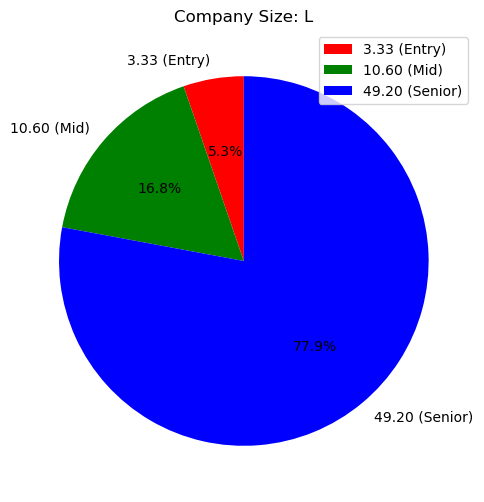

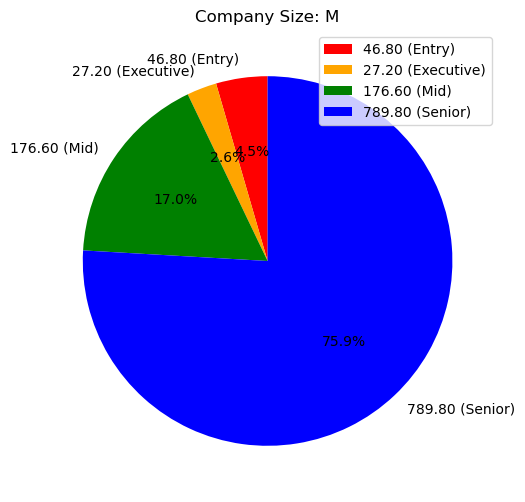

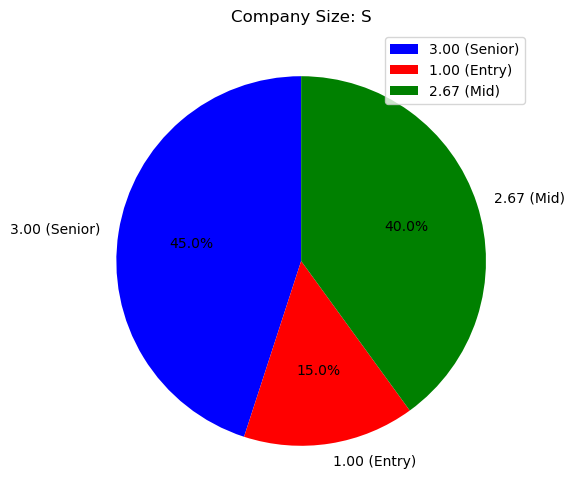

In [13]:
# Define colors for each unique experience level
color_dict = {'EN': 'red', 'MI': 'green', 'SE': 'blue', 'EX': 'orange'}  # Updated color dictionary

# Mapping for renaming experience levels
rename_mapping = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'}

# Plotting individual pie charts with renamed experience levels, save figures, and show
for i, size in enumerate(unique_avg['company_size']):
    plt.figure(figsize=(6, 6))
    
    unique_averages = unique_avg[unique_avg['company_size'] == size]['average_count'].explode()
    experience_levels = unique_avg[unique_avg['company_size'] == size]['experience_level'].explode()
    
    # Rename experience levels in labels
    renamed_levels = [rename_mapping.get(level, level) for level in experience_levels]
    labels = [f'{avg:.2f} ({exp_level})' for avg, exp_level in zip(unique_averages, renamed_levels)]

    plt.pie(unique_averages, labels=labels, autopct='%1.1f%%', startangle=90, colors=[color_dict.get(level, 'gray') for level in experience_levels])
    plt.title(f'Company Size: {size}')
    plt.legend(labels, loc='upper right', bbox_to_anchor=(1, 1))
    
    # Save the figure with tight bounding box
    plt.savefig(f'pie_chart_{size}.png', bbox_inches='tight')
    
    # Display the figure
    plt.show()